## Introduction

Exponential-family random graph models (ERGMs) represent a general class of models based in exponential-family theory for specifying the probability distribution for a set of random graphs or networks. Within this framework, one can—among other tasks—obtain maximum-likehood estimates for the parameters of a specified model for a given data set; test individual models for goodness-of-fit, perform various types of model comparison; and simulate additional networks with the underlying probability distribution implied by that model.

The purpose of representing the graphs or networks in this exponential shape is to allow them take a positive value and also measure the probability associated with the given adjacency matrix for the graph at hand which is the most intuitive way of making the $g$ statistics as a probability measure.

The basic equation of ergm models are presented below.

$P(Y = y) = \frac{e^{\theta^Tg(y)}}{\kappa(\theta)}$

$\kappa(\theta) = \sum_{x \in Y}{e^{\theta^Tg(x)}}$

$Y$ represents the Random Variable for all the graphs, and $y$ represents the graph at hand.

$g$ stands for the statistics we want to include in our model.

$\kappa(\theta)$ is a normalizing term to make the whole equation as a probability measure.

### Logodds, Logit and Interpreting the Results

We are used to thinking about probability as a number between 0 and 1 (or equivalently, 0 to 100%). But this is just a particular mathematical representation of the “degree of plausibility.”

There is a second representation of “degree of plausibility” with which you are familiar: odds ratios. For example, if I tell you that “the odds that an observation is correctly classified is 2:1”, you can check that the probability of correct classification is two thirds. Similarly, “even odds” means 50%. In a similar fashion, the log-odds being the logarithm of odds is capturing a sense of probability of an event happening. There is acutally a term for this kind of capturing the probability called Evidence. The basic formula for evidence is the following: 

$Evidence = log_{10}(odds) = log_{10}(\frac{p}{1 - p})$

There is indeed, a relation between Evidence and how we try to explain the coefficients we get in our ERGM model.
Assume two graphs having the same edges. We denote the graph having the edge $ij$ and all the other edges the same as $y^+_{ij}$. Also, we denote the graph lacking edge $ij$ and al the other edges alluded at first as $y^-_{ij}$.

take the log of the division of the probability resulted by ERGM as follows: 

$log(\frac{p(y^+_{ij})}{p(y^-_{ij})}) = \theta^T[g(y^+_{ij}) - g(y^-_{ij})]$

As you can see the left part of the equation results in a log odds format. So, we can state that with edge $ij$ being added to the network the evidence of the network would increase with the magnitude of $\theta$.

To link the basic understanding we develop here, you can think of the results with respect to their probability in the followin way: 

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;odds = e^s$

$P(True) = \frac{e^s}{1 + e^s}\;\;\;\;\;\;\;\;\;\;P(False) = \frac{1}{1 + e^s}$


### Erdos-Renyi

An easy Example of this probabily model would be the Erdos-Renyi random model which accounts for the number of links in the model and density of the netowrk. 

Having the probability model of erdos-renyi graph, we can rewrite the equation and reach the final equation in the form of an ERGM. 

$l(g) = number\;of\;links$

$P(x) = p^{l(g)}(1 - p)^{n(n-1)/2 - l(g)}$

$P(x) = (\frac{p}{1 - p})^{l(g)}(1-p)^{n(n-1)/2 - l(g)}$

$P(x) = exp(logit(p)l(g) - c)$

### Importing the library statnet including all the required libraries for our work 
ergm, sna, and network packages are included (no need to be imported directly)

In [ ]:
library('statnet')

In [2]:
set.seed(0)
# for the purpose of repeatability of the results

In [6]:
# Loading the dataset
# This dataset contains two networks, namely, the flomarriage and flobusiness 
data(florentine)

In [51]:
flomarriage

 Network attributes:
  vertices = 16 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 20 
    missing edges= 0 
    non-missing edges= 20 

 Vertex attribute names: 
    priorates totalties vertex.names wealth 

No edge attributes

To get the attributes related to the edges or vertices present in the graph we can use the command, get.[vertex, edges].attributes(network, "name of the attribute")

In [16]:
family_names = get.vertex.attribute(flomarriage, 'vertex.names')

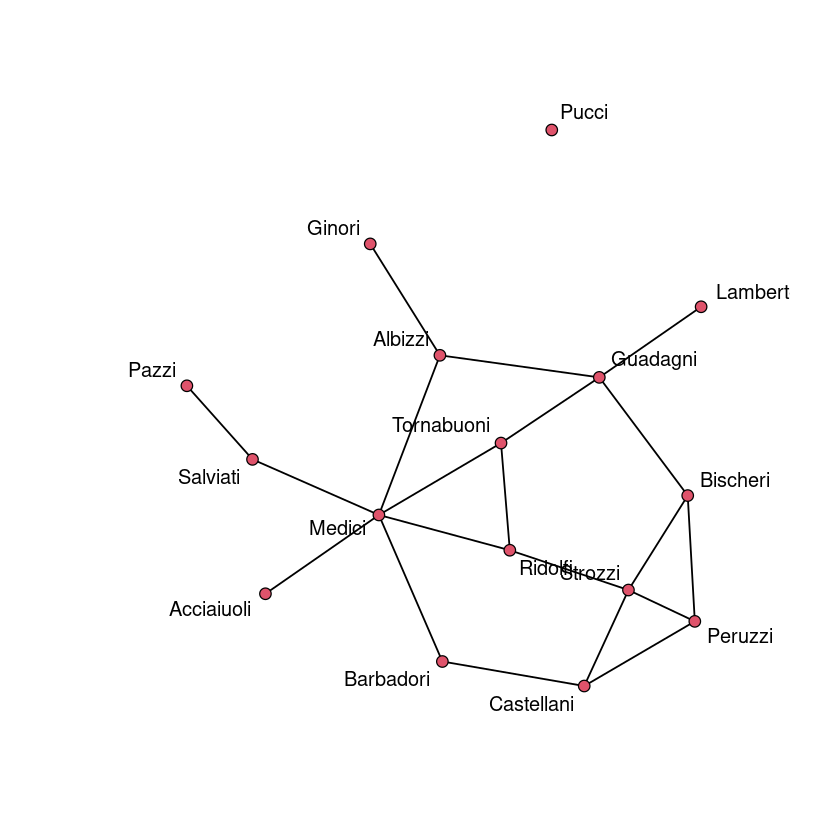

In [17]:
par(bg = 'white')
plot(flomarriage, label = family_names)

### Bernouli Model (Erdos-Renyi)

In [ ]:
flomodel.01 <- ergm(flomarriage ~ edges) 

In [22]:
summary(flomodel.01) 

Call:
ergm(formula = flomarriage ~ edges)

Iterations:  5 out of 20 

Monte Carlo MLE Results:
      Estimate Std. Error MCMC % z value Pr(>|z|)    
edges  -1.6094     0.2449      0  -6.571   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 166.4  on 120  degrees of freedom
 Residual Deviance: 108.1  on 119  degrees of freedom
 
AIC: 110.1    BIC: 112.9    (Smaller is better.) 

To interpret the results we can write the following equation stating the with each unit increase in the number of links, the logodds of having a tie would change to which degree.

$logodds = -1.6094 \times 1$

With respect to the equation we got for evidence and probability, we can state that the probability of observing the network having the edge $ij$ is: 

$\frac{e^{-1.6094}}{1 + e^{-1.6094}} = 0.166671933$

This value is completely inline with the density of the graph which in the Bernouli Model is the probability of having a tie.

In [23]:
summary(flomarriage ~ edges + triangle) 

edges triangle 
      20        3

Having triangles in our network we can capture the effect of trianlges on the probability of observing the actual network

In [ ]:
flomodel.02 <- ergm(flomarriage ~ edges + triangle)

In [25]:
summary(flomodel.02)

Call:
ergm(formula = flomarriage ~ edges + triangle)

Iterations:  2 out of 20 

Monte Carlo MLE Results:
         Estimate Std. Error MCMC % z value Pr(>|z|)    
edges     -1.6771     0.3505      0  -4.784   <1e-04 ***
triangle   0.1560     0.5924      0   0.263    0.792    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 166.4  on 120  degrees of freedom
 Residual Deviance: 108.1  on 118  degrees of freedom
 
AIC: 112.1    BIC: 117.6    (Smaller is better.) 

In addition to the information regarding the structure of the network, we can use the terms which are related to the information of the nodes.
We will use the term `nodecov` for the purpose of our study. 

In [26]:
wealth = flomarriage %v% 'wealth'

In [27]:
wealth

[1]  10  36  55  44  20  32   8  42 103  48  49   3  27  10 146  48

In [ ]:
flomodel.03 = ergm(flomarriage ~ edges + triangle + nodecov('wealth'))

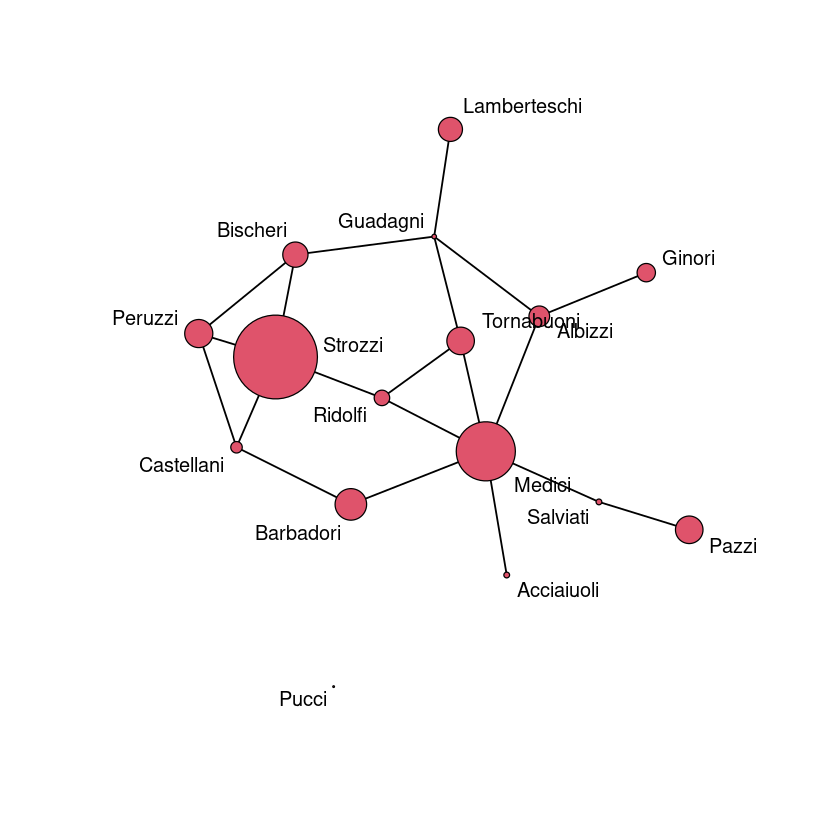

In [37]:
plot(flomarriage, vertex.cex = wealth / 20, label = flomarriage %v% 'vertex.names')

In [38]:
summary(flomodel.03)

Call:
ergm(formula = flomarriage ~ edges + triangle + nodecov("wealth"))

Iterations:  2 out of 20 

Monte Carlo MLE Results:
                Estimate Std. Error MCMC % z value Pr(>|z|)    
edges          -2.575938   0.555882      0  -4.634   <1e-04 ***
triangle       -0.117056   0.620138      0  -0.189   0.8503    
nodecov.wealth  0.010909   0.004982      0   2.190   0.0286 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 166.4  on 120  degrees of freedom
 Residual Deviance: 103.1  on 117  degrees of freedom
 
AIC: 109.1    BIC: 117.4    (Smaller is better.) 

Observing the results, we can conclude that there is a significant effect of the sum of the wealth of two families having on them sharing a tie. 

### Faux Mesa High

In [39]:
data(faux.mesa.high)

In [41]:
fmh = faux.mesa.high

In [42]:
fmh

 Network attributes:
  vertices = 205 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 203 
    missing edges= 0 
    non-missing edges= 203 

 Vertex attribute names: 
    Grade Race Sex 

No edge attributes

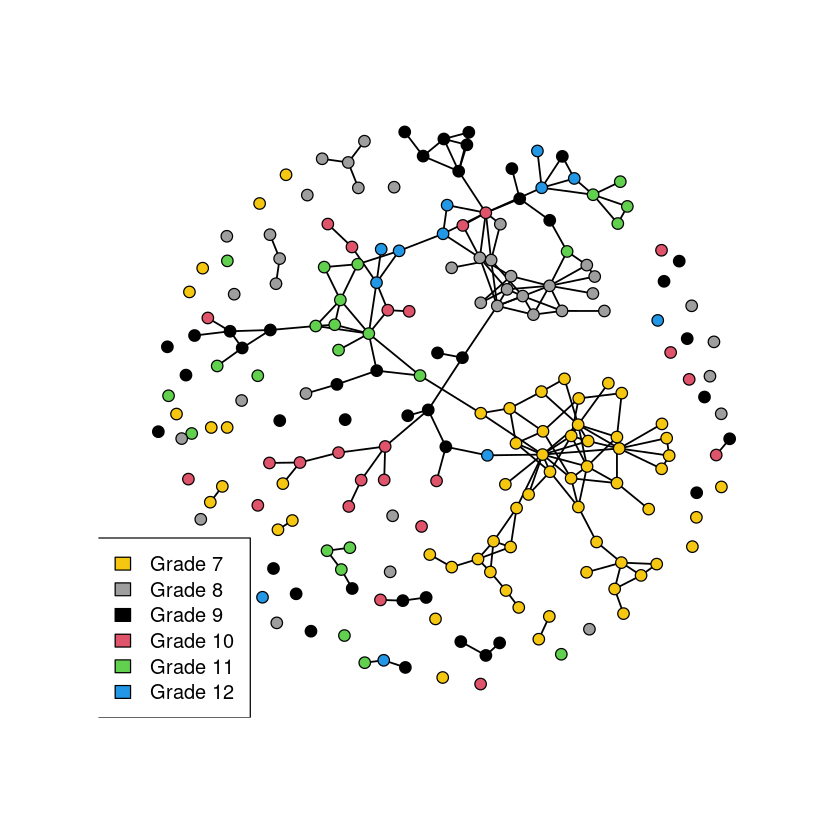

In [59]:
par(bg = 'white')
plot(fmh, vertex.col = 'Grade')
legend('bottomleft', fill = 7:12, legend = paste('Grade', 7:12))

In [ ]:
fauxmodel.01 <- ergm(fmh ~ edges + nodematch("Grade", diff = T) + nodematch("Race", diff = T))

In this example we can look at how categorical nodal attributes might affect the way ties are generated. By setting the diff = T we can specify the differential to true which means that we can account for all the values that the nodal attribute can get. In other words, we are capturing the within group tie logodds for each group of the nodal attribute interested.

In [67]:
summary(fauxmodel.01)

Call:
ergm(formula = fmh ~ edges + nodematch("Grade", diff = T) + nodematch("Race", 
    diff = T))

Iterations:  8 out of 20 

Monte Carlo MLE Results:
                     Estimate Std. Error MCMC % z value Pr(>|z|)    
edges                 -6.2328     0.1742      0 -35.785   <1e-04 ***
nodematch.Grade.7      2.8740     0.1981      0  14.509   <1e-04 ***
nodematch.Grade.8      2.8788     0.2391      0  12.038   <1e-04 ***
nodematch.Grade.9      2.4642     0.2647      0   9.310   <1e-04 ***
nodematch.Grade.10     2.5692     0.3770      0   6.815   <1e-04 ***
nodematch.Grade.11     3.2921     0.2978      0  11.057   <1e-04 ***
nodematch.Grade.12     3.8376     0.4592      0   8.357   <1e-04 ***
nodematch.Race.Black     -Inf     0.0000      0    -Inf   <1e-04 ***
nodematch.Race.Hisp    0.0679     0.1737      0   0.391   0.6959    
nodematch.Race.NatAm   0.9817     0.1842      0   5.329   <1e-04 ***
nodematch.Race.Other     -Inf     0.0000      0    -Inf   <1e-04 ***
nodematch.Race.Whit

In [69]:
mixingmatrix(fmh, 'Race')

Note:  Marginal totals can be misleading
 for undirected mixing matrices.
      Black Hisp NatAm Other White
Black     0    8    13     0     5
Hisp      8   53    41     1    22
NatAm    13   41    46     0    10
Other     0    1     0     0     0
White     5   22    10     0     4

As you can see, the reason behind the `-Inf`s are that there are no two vertices that both have Black or Other Races, so the model would assign the lowest logodds coefficient possible to them, to avoid observing these kinds of relation in the network.

In [71]:
summary(fmh ~ edges + nodematch("Grade", diff = T) + nodematch("Race", diff = T))

edges    nodematch.Grade.7    nodematch.Grade.8 
                 203                   75                   33 
   nodematch.Grade.9   nodematch.Grade.10   nodematch.Grade.11 
                  23                    9                   17 
  nodematch.Grade.12 nodematch.Race.Black  nodematch.Race.Hisp 
                   6                    0                   53 
nodematch.Race.NatAm nodematch.Race.Other nodematch.Race.White 
                  46                    0                    4

In this part, we are willing to see if there is an effect of different kinds of nodal covariates other than homophily. Indeed, there might be an positive correlation between having two different values in terms of Race of two nodes with the probability of them having a tie. 

In [ ]:
flomodel.04 = ergm(fmh ~ edges + nodemix('Race') + nodemix('Grade'))

In [74]:
summary(flomodel.04)

Call:
ergm(formula = fmh ~ edges + nodemix("Race") + nodemix("Grade"))

Iterations:  6 out of 20 

Monte Carlo MLE Results:
                     Estimate Std. Error MCMC % z value Pr(>|z|)    
edges                 -1.1285     0.6962      0  -1.621 0.105042    
mix.Race.Black.Black     -Inf     0.0000      0    -Inf  < 1e-04 ***
mix.Race.Black.Hisp   -0.7732     0.6513      0  -1.187 0.235173    
mix.Race.Hisp.Hisp    -1.2884     0.5514      0  -2.337 0.019449 *  
mix.Race.Black.NatAm   0.1976     0.6143      0   0.322 0.747673    
mix.Race.Hisp.NatAm   -1.7646     0.5561      0  -3.173 0.001507 ** 
mix.Race.NatAm.NatAm  -0.3443     0.5552      0  -0.620 0.535221    
mix.Race.Black.Other     -Inf     0.0000      0    -Inf  < 1e-04 ***
mix.Race.Hisp.Other   -2.3791     1.1436      0  -2.080 0.037487 *  
mix.Race.NatAm.Other     -Inf     0.0000      0    -Inf  < 1e-04 ***
mix.Race.Other.Other     -Inf     0.0000      0    -Inf  < 1e-04 ***
mix.Race.Black.White   0.8012     0.7229      0 

### Sampson Monk

In [77]:
data(samplk)

In [78]:
samplk1

 Network attributes:
  vertices = 18 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 55 
    missing edges= 0 
    non-missing edges= 55 

 Vertex attribute names: 
    cloisterville group vertex.names 

No edge attributes

edges mutual 
    56     15

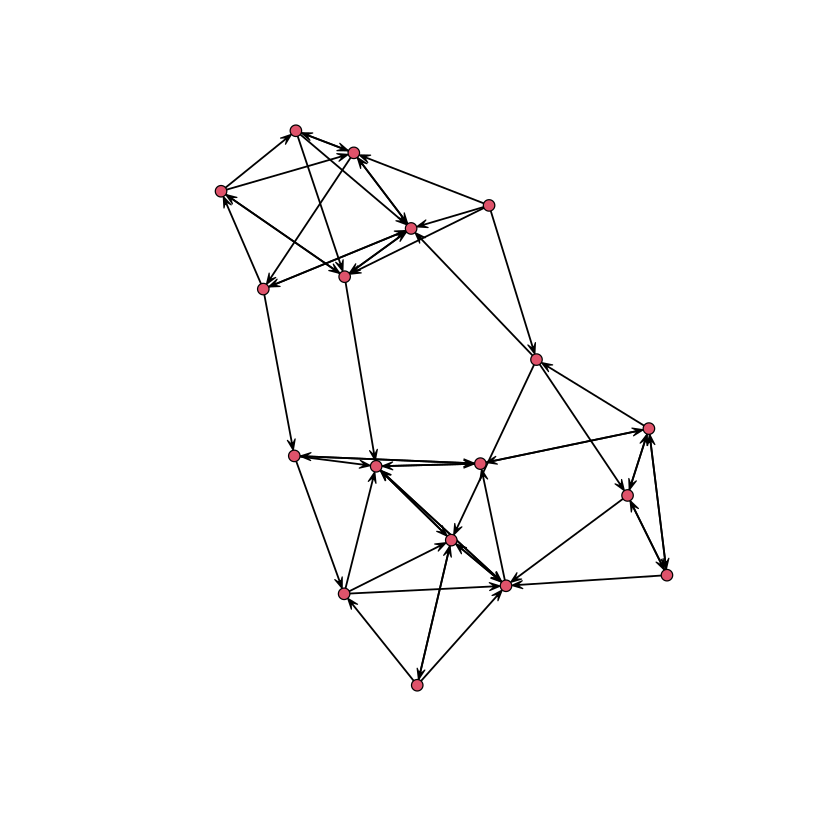

In [79]:
plot(samplk3)
summary(samplk3 ~ edges + mutual)

In [ ]:
sampmodel.01 <- ergm(samplk3 ~ edges + mutual)

In [81]:
summary(sampmodel.01)

Call:
ergm(formula = samplk3 ~ edges + mutual)

Iterations:  2 out of 20 

Monte Carlo MLE Results:
       Estimate Std. Error MCMC % z value Pr(>|z|)    
edges   -2.1574     0.2138      0 -10.089   <1e-04 ***
mutual   2.3031     0.4708      0   4.892   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 424.2  on 306  degrees of freedom
 Residual Deviance: 267.8  on 304  degrees of freedom
 
AIC: 271.8    BIC: 279.2    (Smaller is better.) 

### Network Simulation

The best way to check whether the model is fitting on the observed data is to simulate several models and check some local and global statistics of the simulated networks with the one observed at first. To name a few local statistics, we can allude to the statistics we use in specifying the model like the number of triangles and the number of edges presented in the network. On the other hand, to look at the more latent statistics such as the geodesic distance between two nodes, degree of the nodes, and the edge-wise shared partner statistic. although these statistics were not captured in the model in the first place, the degree to which our model captures them can be a cardinal observation to check the fitness of the model.

In [82]:
flomodel.03.sim <- simulate(flomodel.03, nsim = 10)

In [83]:
summary(flomodel.03.sim)

Number of Networks: 10 
Model: flomarriage ~ edges + triangle + nodecov("wealth") 
Reference: ~Bernoulli 
Constraints: ~. 
Parameters:
         edges       triangle nodecov.wealth 
   -2.57593773    -0.11705572     0.01090864 

Stored network statistics:
      edges triangle nodecov.wealth
 [1,]    14        3           1897
 [2,]    20        5           2413
 [3,]    20        2           2374
 [4,]    28        6           2569
 [5,]    22        4           2471
 [6,]    17        1           1971
 [7,]    23        6           2637
 [8,]    19        1           1749
 [9,]    21        4           2446
[10,]    27        5           2579
attr(,"monitored")
[1] FALSE FALSE FALSE



Number of Networks: 10 
Model: flomarriage ~ edges + triangle + nodecov("wealth") 
Reference: ~Bernoulli 
Constraints: ~. 
Parameters:
         edges       triangle nodecov.wealth 
   -2.57593773    -0.11705572     0.01090864 


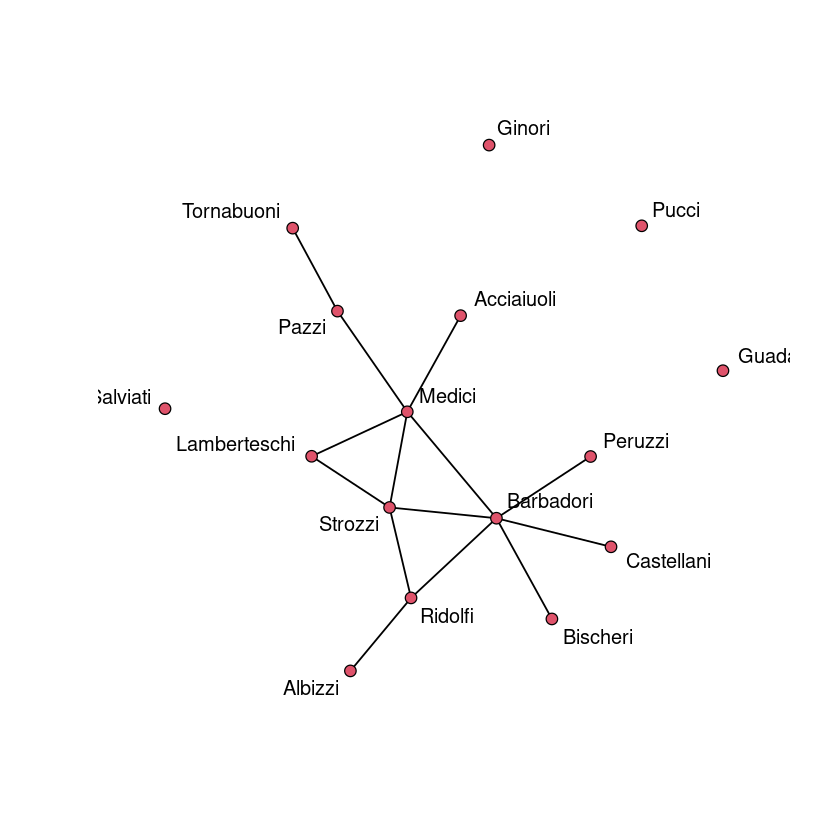

In [92]:
plot(flomodel.03.sim[[1]], label = flomodel.03.sim[[1]] %v% "vertex.names")

In [93]:
flo.03.gof.model <- gof(flomodel.03 ~ model)

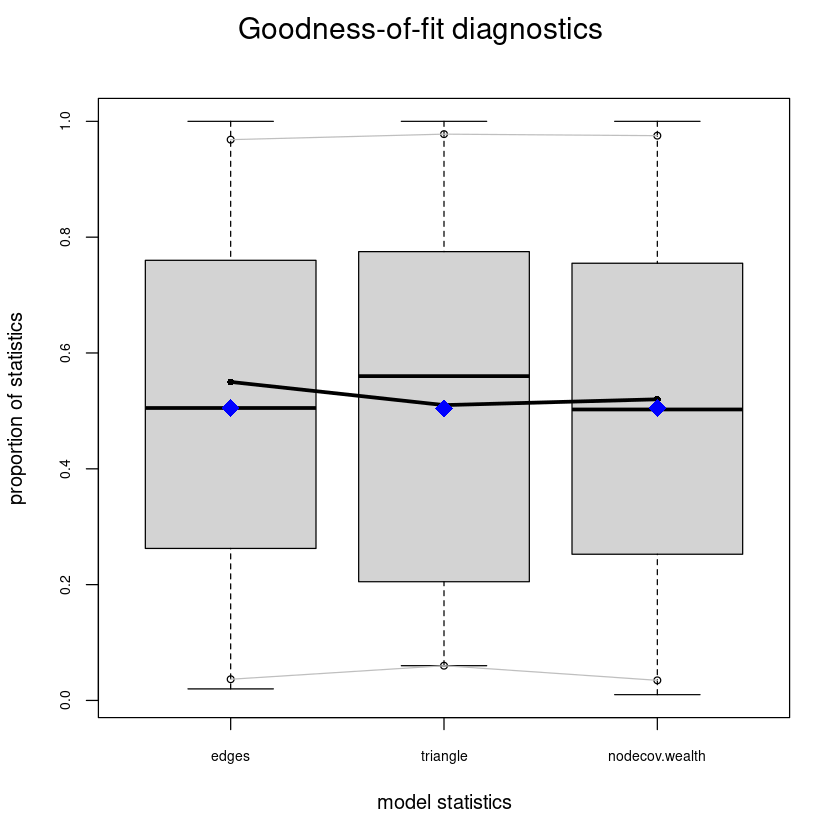

In [95]:
plot(flo.03.gof.model)

In [96]:
flo.03.gof.global <- gof(flomodel.03 ~ degree + esp + distance)

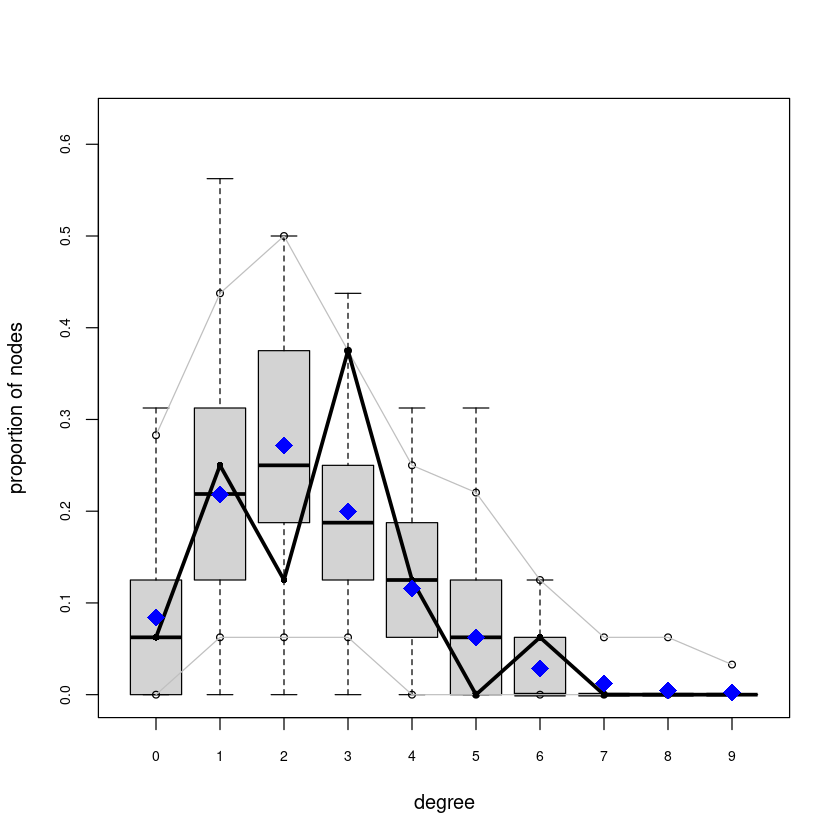

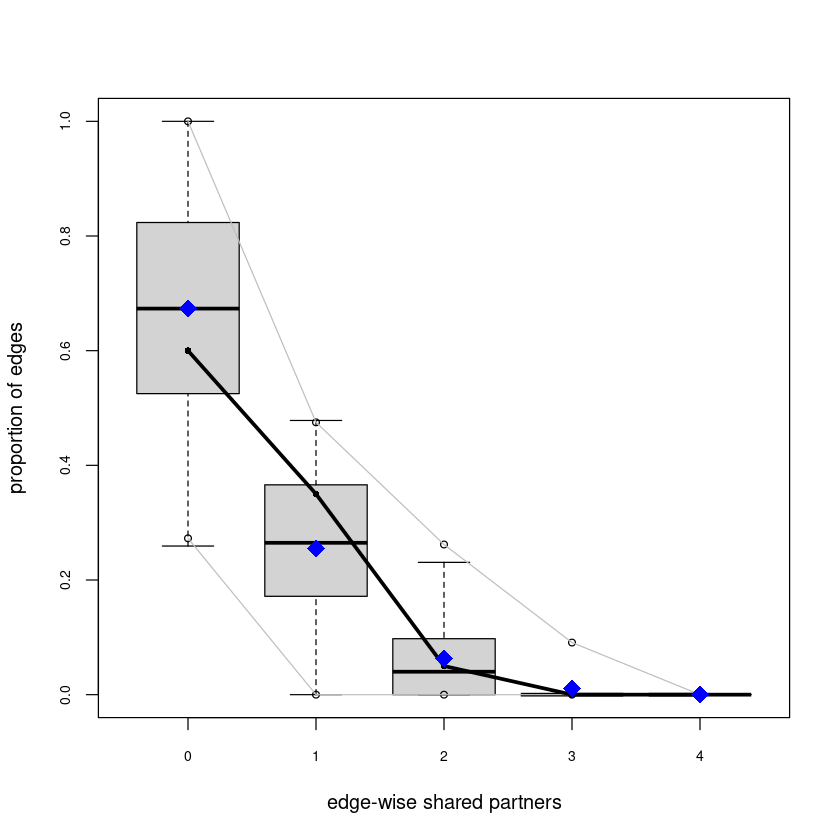

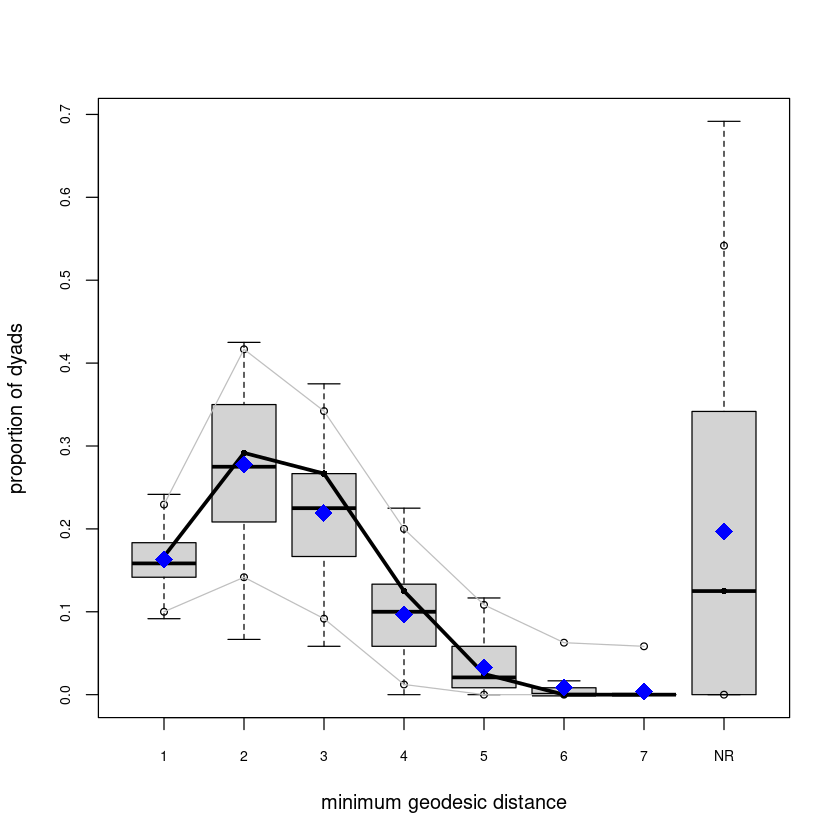

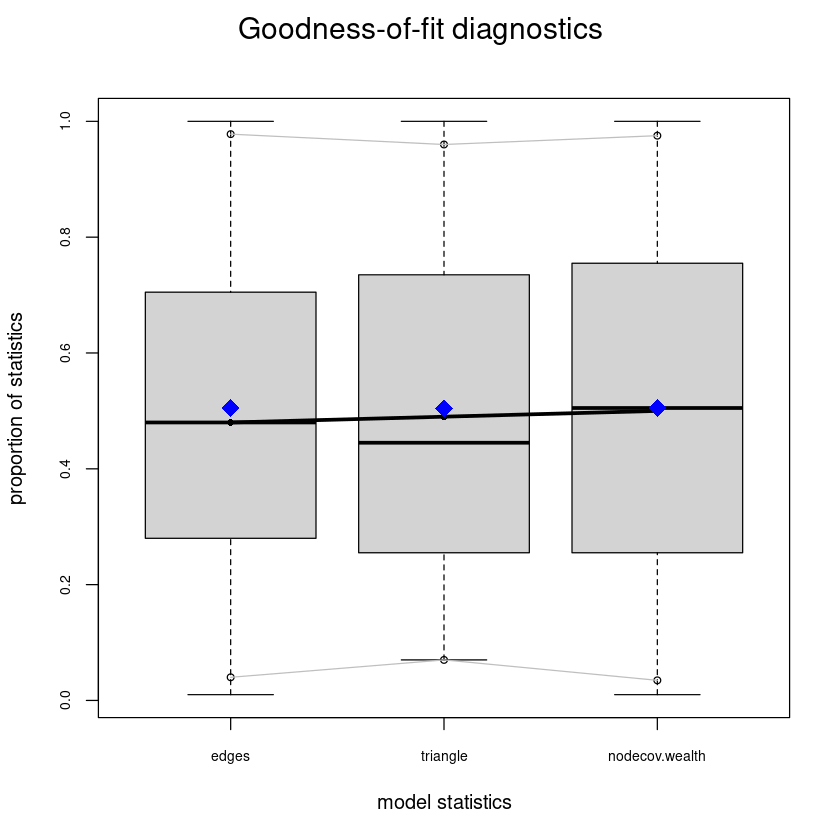

In [97]:
plot(flo.03.gof.global)

edges triangle 
     974      169

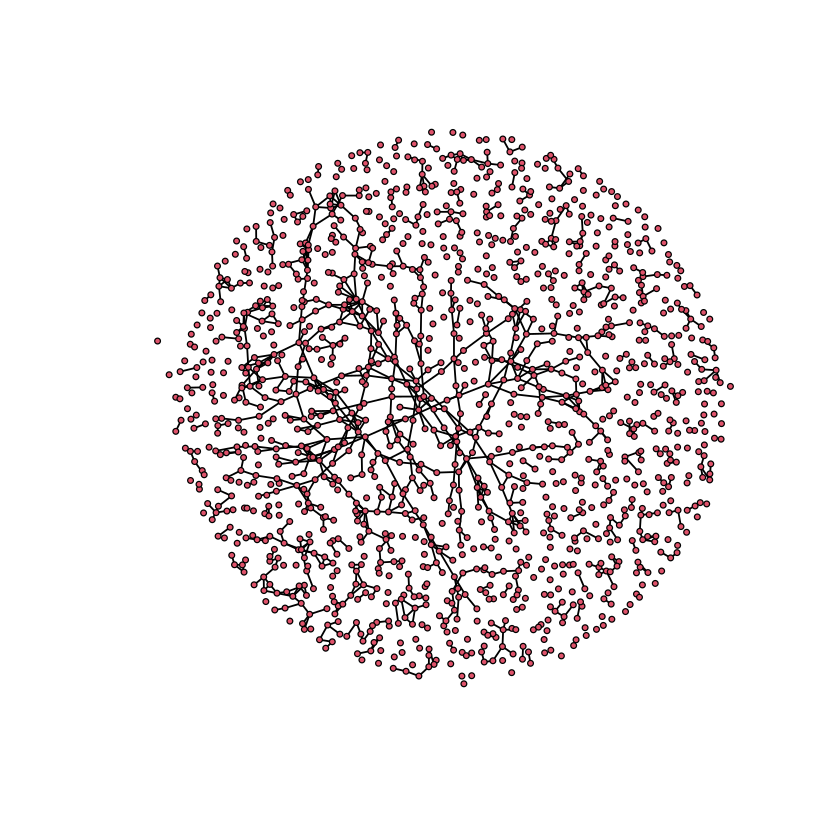

In [98]:
data("faux.magnolia.high")
magnolia <- faux.magnolia.high
plot(magnolia, vertex.cex = 0.5)
summary(magnolia ~ edges + triangle)

To check the succession of the steps the model takes, we can limit the number of iterations the MCMC algorithm does.

In [ ]:
fit.mag.01 <- ergm(magnolia ~ edges + triangle, control = control.ergm(MCMLE.maxit = 2))

Sample statistics summary:

Iterations = 16384:1063936
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 1024 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

            Mean     SD Naive SE Time-series SE
edges    -151.69 29.362   0.9176          2.384
triangle  -66.92  7.625   0.2383          3.004

2. Quantiles for each variable:

         2.5%  25%  50%  75%  97.5%
edges    -210 -171 -152 -133 -91.15
triangle  -85  -71  -67  -63 -49.00


Sample statistics cross-correlations:
             edges  triangle
edges    1.0000000 0.3063601
triangle 0.3063601 1.0000000

Sample statistics auto-correlation:
Chain 1 
             edges  triangle
Lag 0    1.0000000 1.0000000
Lag 1024 0.6233612 0.9874783
Lag 2048 0.4117683 0.9760002
Lag 3072 0.3172391 0.9651958
Lag 4096 0.2572554 0.9553988
Lag 5120 0.2379390 0.9465070

Sample statistics burn-in diagnostic (Geweke):
Chain 1 

Fraction in 1st window = 0.1
Fraction in 2nd wind

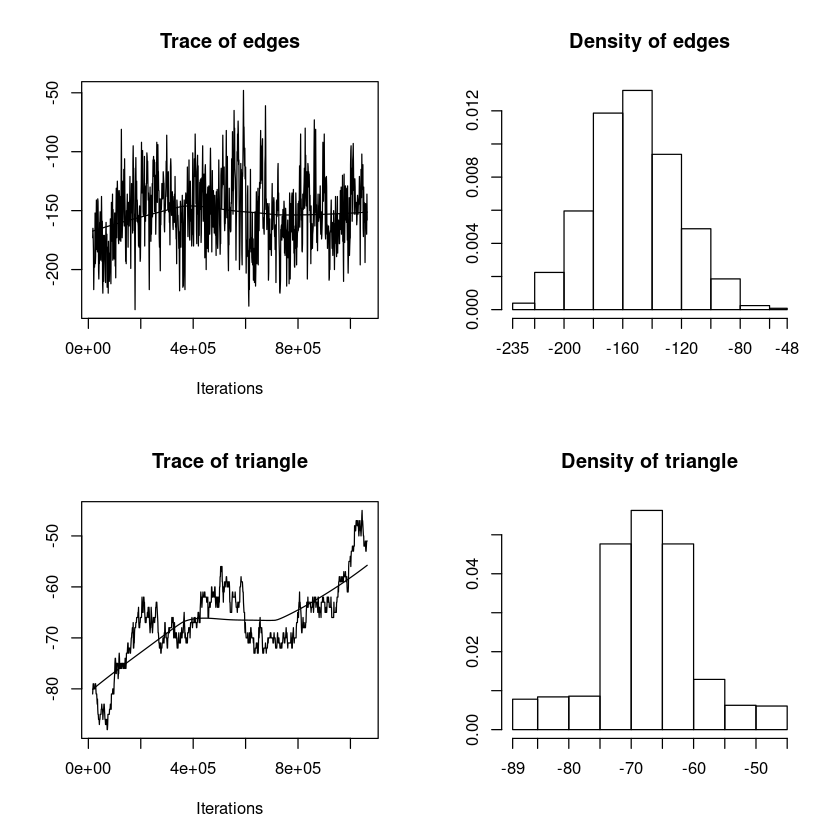

In [100]:
mcmc.diagnostics(fit.mag.01)

As you can see there is a upward trend toward higher triangles in the network and somewhat wrong one. To mitigate this issue, we can use the edge-wise shared partners which is a more robust version of capturing the triads.

In [106]:
fit.mag.02 <- ergm(magnolia ~ edges + gwesp(0.25, fixed = T))

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 0.564118708967031.

The log-likelihood improved by 2.688.

Iteration 2 of at most 20:

Optimizing with step length 0.307791714715206.

The log-likelihood improved by 1.624.

Iteration 3 of at most 20:

Optimizing with step length 0.365821076614465.

The log-likelihood improved by 1.479.

Iteration 4 of at most 20:

Optimizing with step length 0.81626229544742.

The log-likelihood improved by 2.138.

Iteration 5 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 1.558.

Step length converged once. Increasing MCMC sample size.

Iteration 6 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.001126.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating lo

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                  Mean    SD Naive SE Time-series SE
edges            1.467 56.76   0.8869          20.47
gwesp.fixed.0.25 2.148 53.06   0.8290          28.99

2. Quantiles for each variable:

                   2.5%    25%   50%   75% 97.5%
edges            -112.0 -41.00  8.00 45.00 95.62
gwesp.fixed.0.25 -101.8 -33.95 10.16 44.71 79.88


Sample statistics cross-correlations:
                     edges gwesp.fixed.0.25
edges            1.0000000        0.9022208
gwesp.fixed.0.25 0.9022208        1.0000000

Sample statistics auto-correlation:
Chain 1 
             edges gwesp.fixed.0.25
Lag 0    1.0000000        1.0000000
Lag 1024 0.9209056        0.9983657
Lag 2048 0.8727771        0.9966850
Lag 3072 0.8462718        0.9950158
Lag 4096 0.8325360        0.993

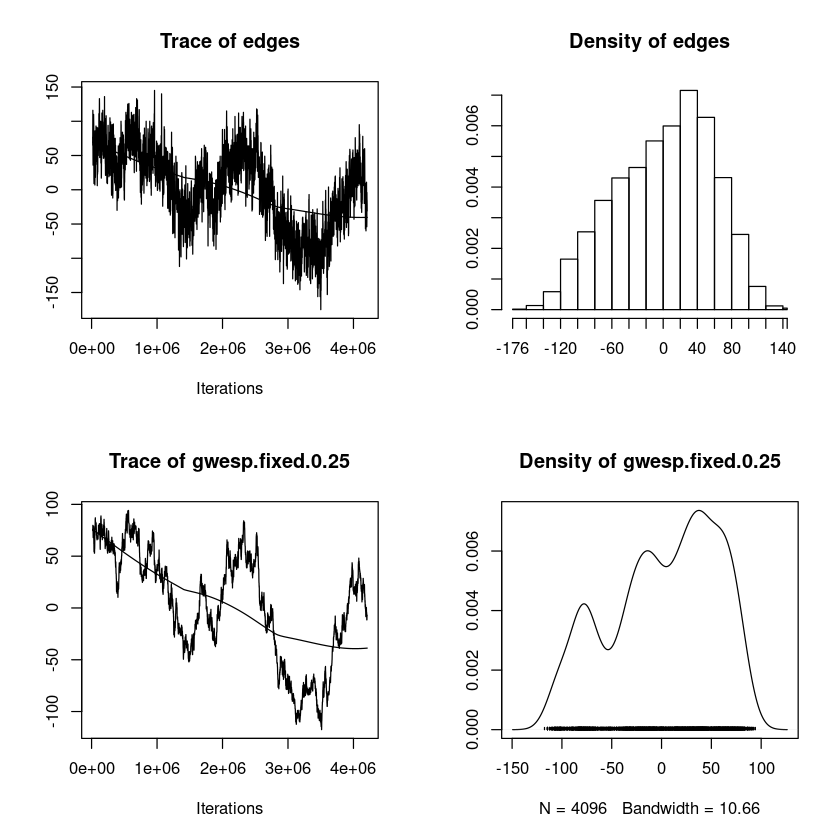

In [107]:
mcmc.diagnostics(fit.mag.02)

In [108]:
gof.mag.02.model <- gof(fit.mag.02, GOF = ~model)

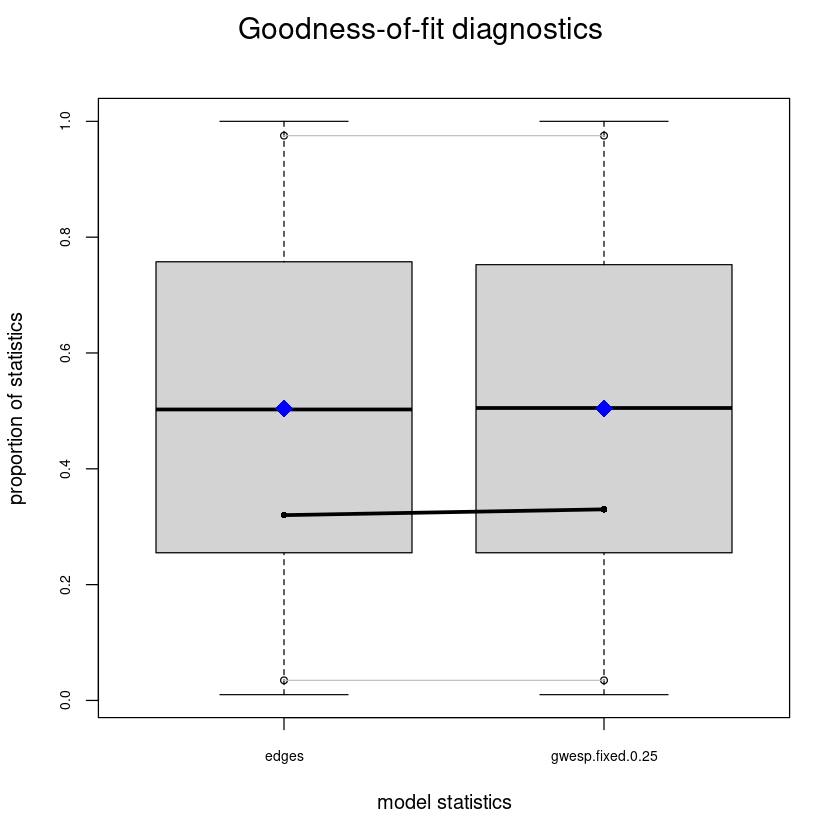

In [109]:
plot(gof.mag.02.model)

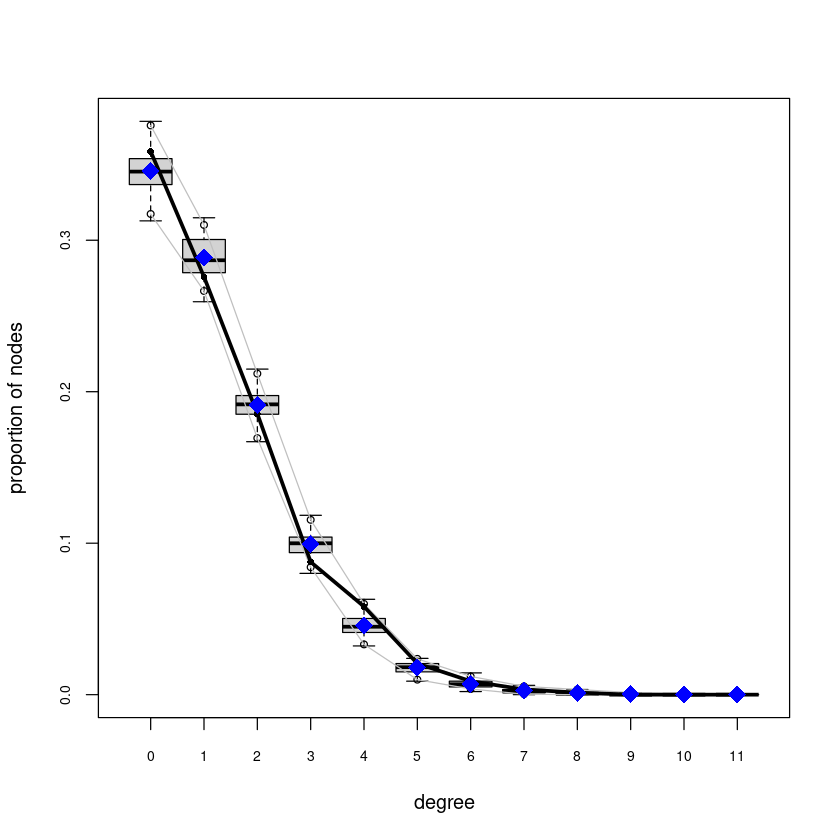

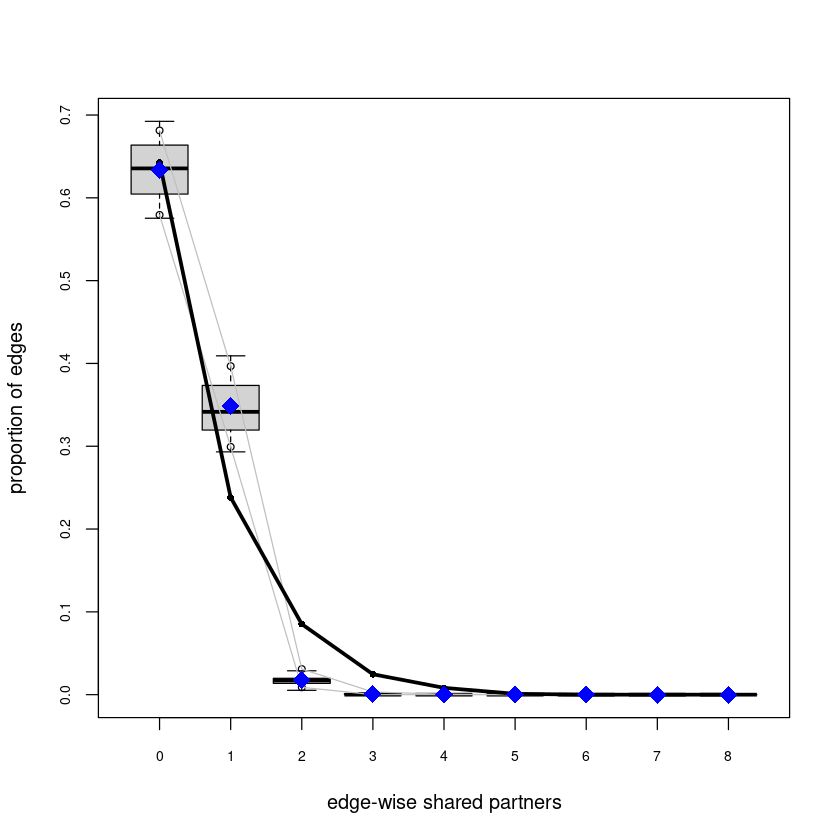

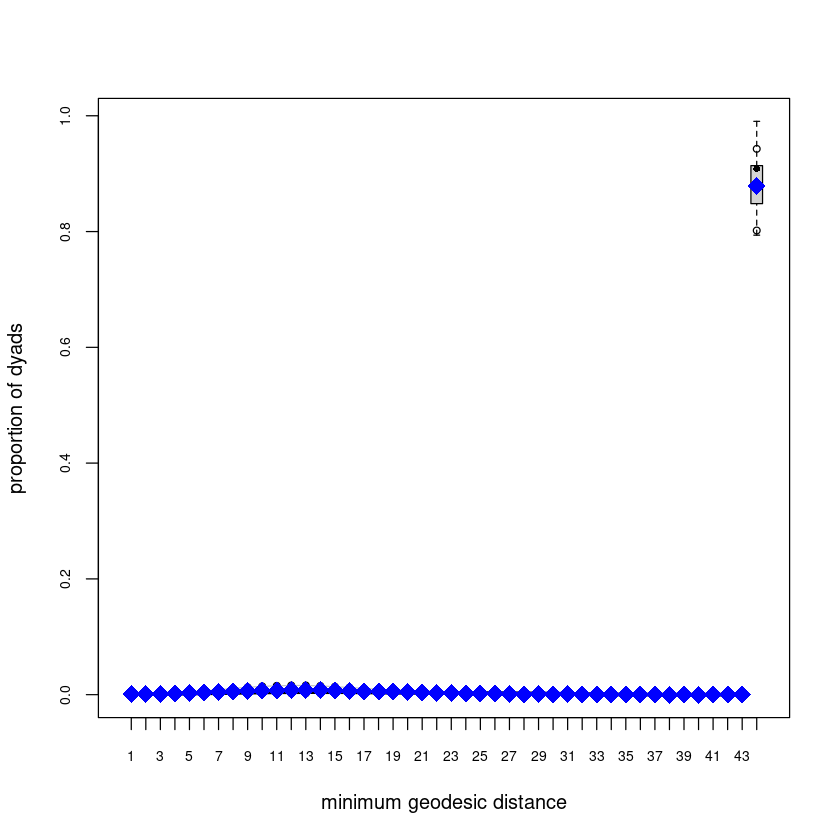

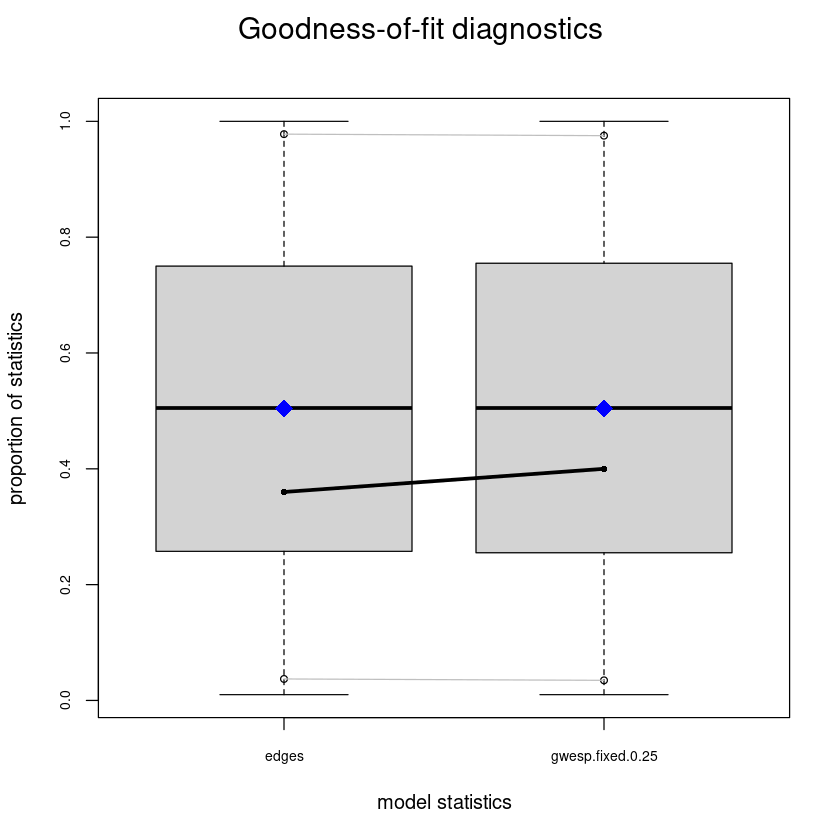

In [110]:
plot(gof(fit.mag.02 ~ degree + esp + distance))

To fit a better model and resolve the issue with the autocorrelation with the trends observed in the plots

In [ ]:
fit.mag.03 <- ergm(magnolia ~ edges + gwesp(0.25, fixed = T) + nodematch("Grade") + 
    nodematch("Race") + nodematch("Sex"), control = control.ergm(MCMC.interval = 20000), 
    eval.loglik = F)

In [112]:
summary(fit.mag.03)

Log-likelihood was not estimated for this fit. To get deviances, AIC, and/or BIC, use ‘*fit* <-logLik(*fit*, add=TRUE)’ to add it to the object or rerun this function with eval.loglik=TRUE.



Call:
ergm(formula = magnolia ~ edges + gwesp(0.25, fixed = T) + nodematch("Grade") + 
    nodematch("Race") + nodematch("Sex"), eval.loglik = F, control = control.ergm(MCMC.interval = 20000))

Iterations:  13 out of 20 

Monte Carlo MLE Results:
                 Estimate Std. Error MCMC % z value Pr(>|z|)    
edges            -9.77621    0.10455      0  -93.50   <1e-04 ***
gwesp.fixed.0.25  1.79871    0.04913      0   36.61   <1e-04 ***
nodematch.Grade   2.74487    0.08759      0   31.34   <1e-04 ***
nodematch.Race    0.91063    0.07529      0   12.10   <1e-04 ***
nodematch.Sex     0.75864    0.05990      0   12.66   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Sample statistics summary:

Iterations = 320000:82220000
Thinning interval = 20000 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                   Mean    SD Naive SE Time-series SE
edges            2.8120 47.85   0.7477          5.283
gwesp.fixed.0.25 4.0832 43.45   0.6788          5.586
nodematch.Grade  2.5164 45.77   0.7152          5.295
nodematch.Race   2.4180 43.71   0.6829          4.793
nodematch.Sex    0.5093 39.05   0.6101          4.217

2. Quantiles for each variable:

                   2.5%    25%    50%   75%  97.5%
edges            -84.00 -32.00  0.000 36.00 101.00
gwesp.fixed.0.25 -68.22 -29.49  1.663 35.31  89.77
nodematch.Grade  -79.00 -31.00 -1.000 34.00  95.00
nodematch.Race   -75.00 -30.00  0.000 33.00  91.62
nodematch.Sex    -71.00 -27.00 -2.000 26.00  82.00


Sample statistics cross-correlations:
                     edges gwesp.fixed.0.25 nodematch.Grade no

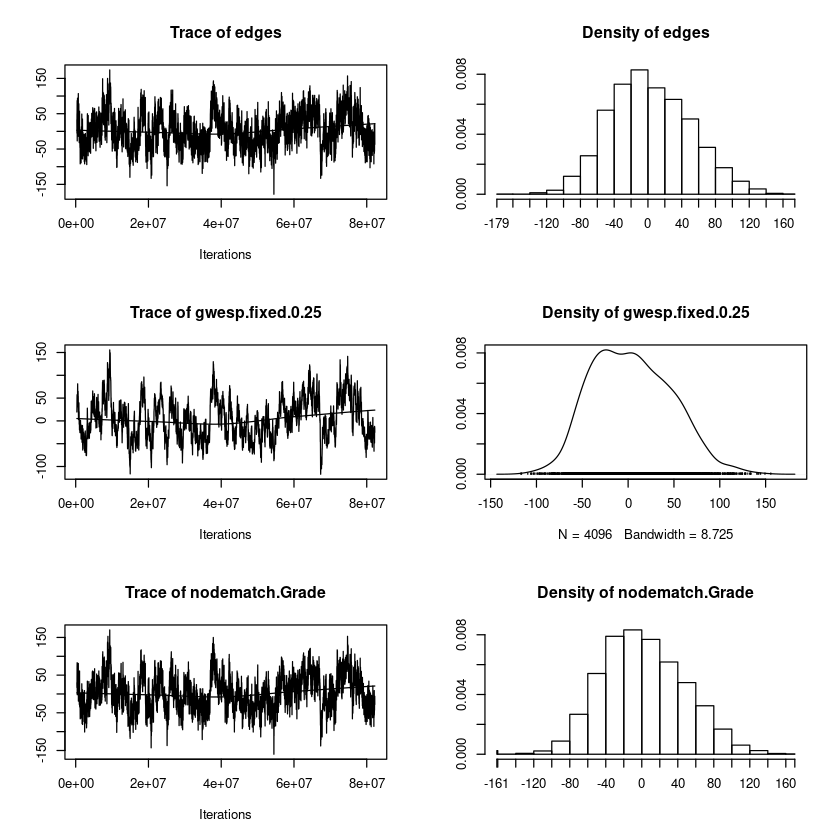


MCMC diagnostics shown here are from the last round of simulation, prior to computation of final parameter estimates. Because the final estimates are refinements of those used for this simulation run, these diagnostics may understate model performance. To directly assess the performance of the final model on in-model statistics, please use the GOF command: gof(ergmFitObject, GOF=~model).


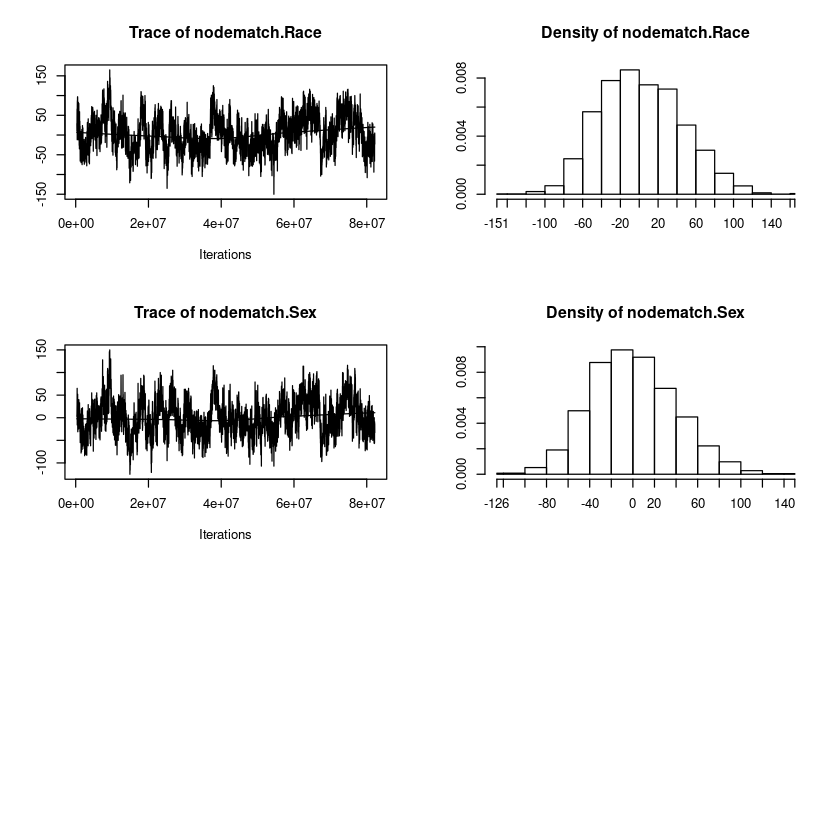

In [113]:
mcmc.diagnostics(fit.mag.03)

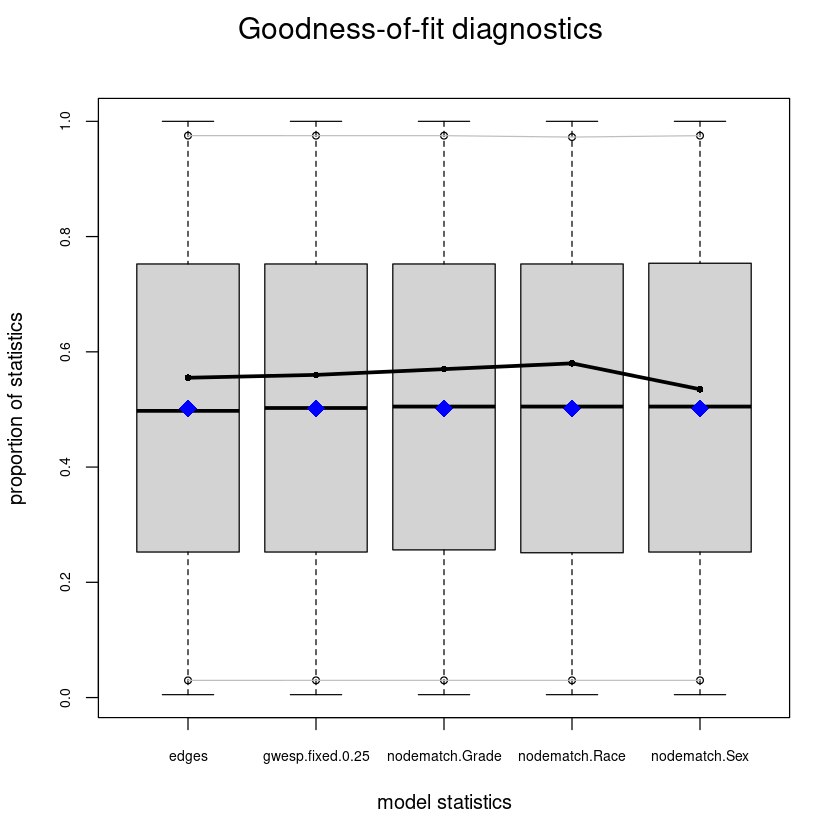

In [114]:
plot(gof(fit.mag.03, GOF = ~model, control = control.gof.ergm(nsim = 200)))

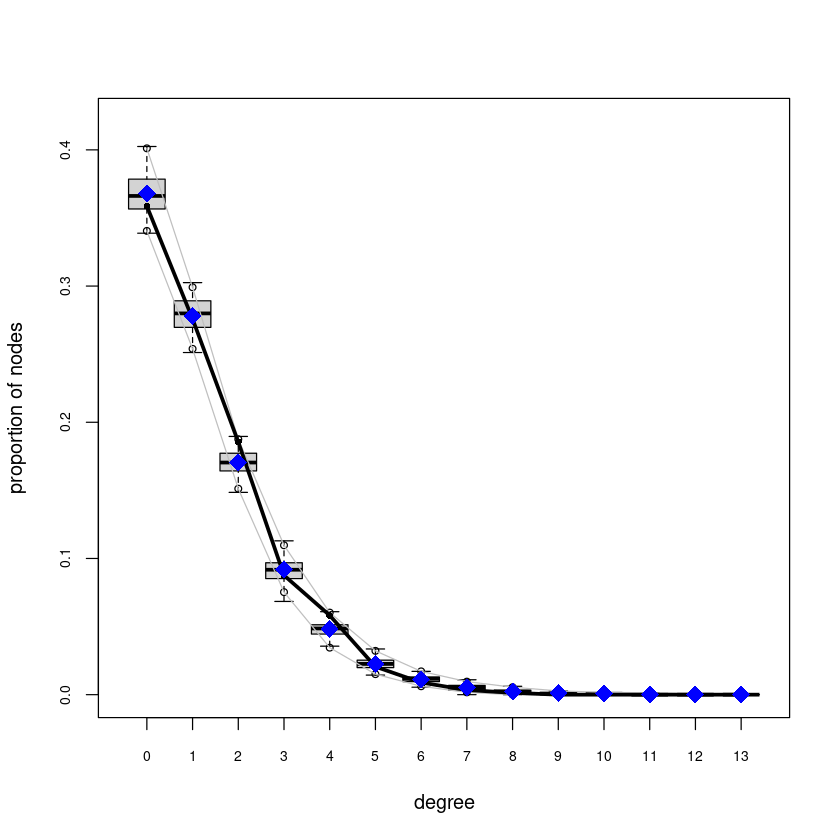

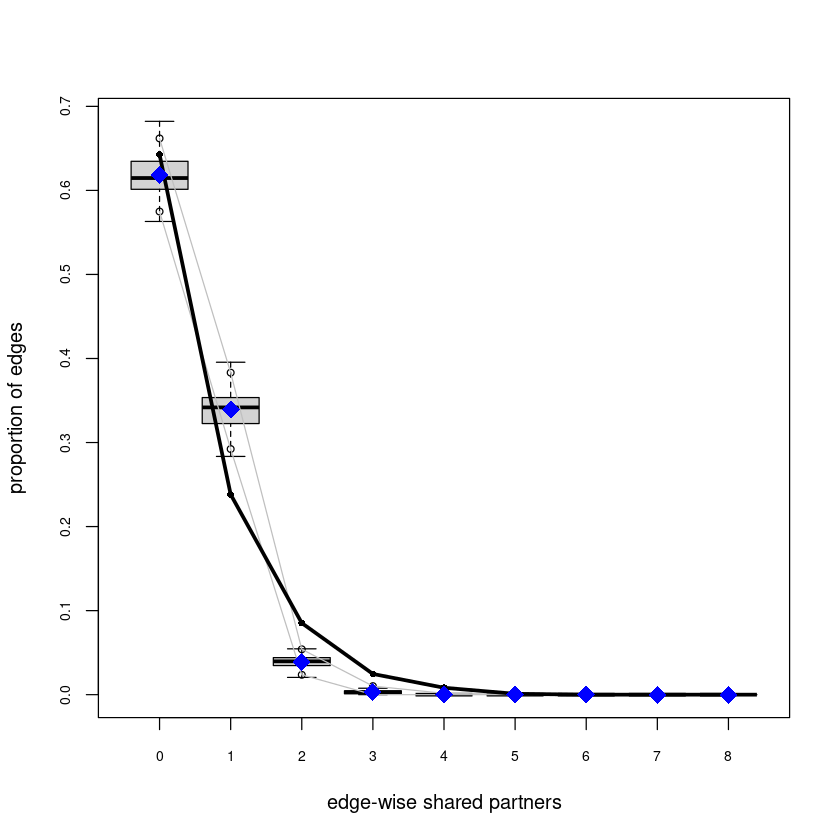

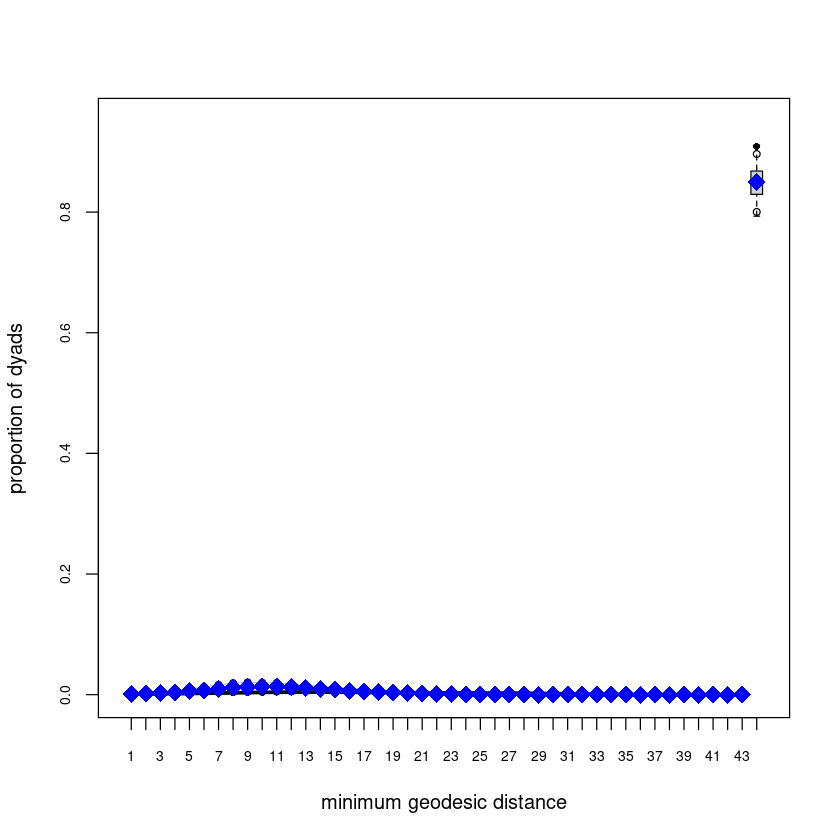

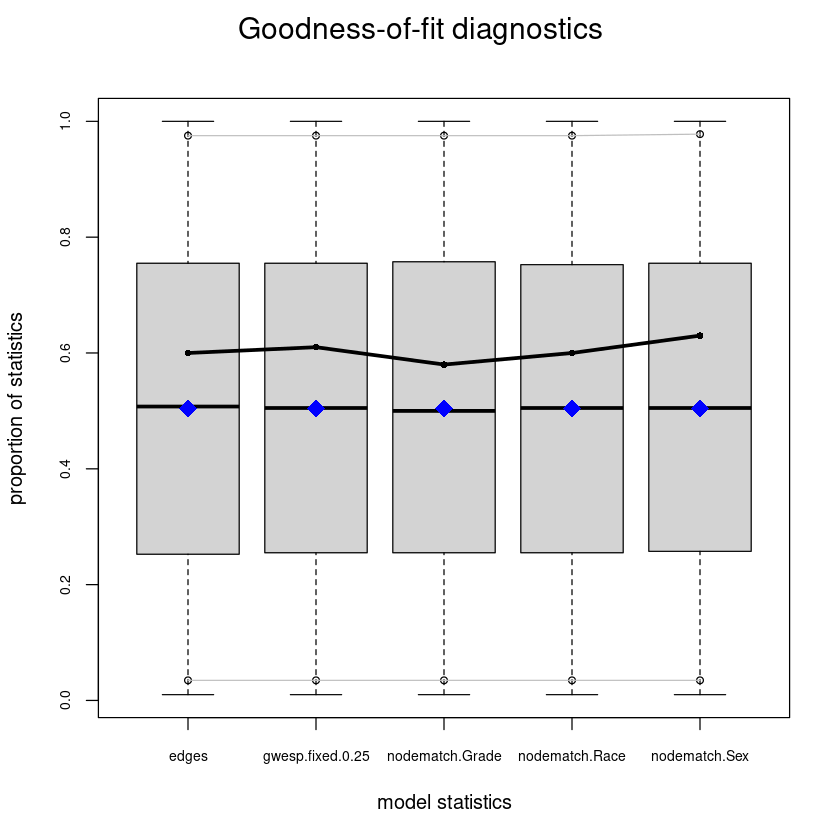

In [115]:
plot(gof(fit.mag.03, GOF = ~degree + esp + distance))